<a href="https://colab.research.google.com/github/FazliNidha/nidha_fazl/blob/main/Ybi_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cancer Prediction**

## **Objective**

**Develop a predictive model to classify tumors as benign or malignant based on the  features.**

## **Data Source**

YBI-Foundation/Dataset - GitHub

## **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Import Data**

In [2]:
Cancer = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Cancer.csv')

In [3]:
Cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
Cancer.tail(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
549,923465,B,10.820,24.21,68.89,361.6,0.08192,0.06602,0.015480,0.00816,...,31.45,83.90,505.6,0.12040,0.16330,0.06194,0.03264,0.3059,0.07626,NaN
550,923748,B,10.860,21.48,68.51,360.5,0.07431,0.04227,0.000000,0.00000,...,24.77,74.08,412.3,0.10010,0.07348,0.00000,0.00000,0.2458,0.06592,NaN
551,923780,B,11.130,22.44,71.49,378.4,0.09566,0.08194,0.048240,0.02257,...,28.26,77.80,436.6,0.10870,0.17820,0.15640,0.06413,0.3169,0.08032,NaN
552,924084,B,12.770,29.43,81.35,507.9,0.08276,0.04234,0.019970,0.01499,...,36.00,88.10,594.7,0.12340,0.10640,0.08653,0.06498,0.2407,0.06484,NaN
553,924342,B,9.333,21.94,59.01,264.0,0.09240,0.05605,0.039960,0.01282,...,25.05,62.86,295.8,0.11030,0.08298,0.07993,0.02564,0.2435,0.07393,NaN
554,924632,B,12.880,28.92,82.50,514.3,0.08123,0.05824,0.061950,0.02343,...,35.74,88.84,595.7,0.12270,0.16200,0.24390,0.06493,0.2372,0.07242,NaN
555,924934,B,10.290,27.61,65.67,321.4,0.09030,0.07658,0.059990,0.02738,...,34.91,69.57,357.6,0.13840,0.17100,0.20000,0.09127,0.2226,0.08283,NaN
556,924964,B,10.160,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742,NaN
557,925236,B,9.423,27.88,59.26,271.3,0.08123,0.04971,0.000000,0.00000,...,34.24,66.50,330.6,0.10730,0.07158,0.00000,0.00000,0.2475,0.06969,NaN
558,925277,B,14.590,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,...,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004,NaN


## **Describe Data**

In [5]:
Cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
Cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


## **Data Visualization**

In [7]:
Cancer['diagnosis'].replace({"B":"0", "M":"1"}, inplace=True)

<ipython-input-7-183f988554ec>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Cancer['diagnosis'].replace({"B":"0", "M":"1"}, inplace=True)


'B': Benign tumor (non-cancerous)    'B': 0

'M': Malignant tumor (cancerous)     'M' :1

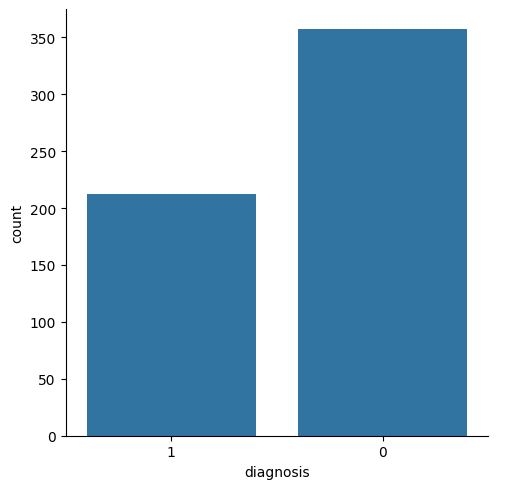

In [8]:
sns.catplot(x='diagnosis', data=Cancer, kind='count')

0 =  Benign tumor (non-cancerous)

1 =  Malignant tumor (cancerous)

<Axes: >

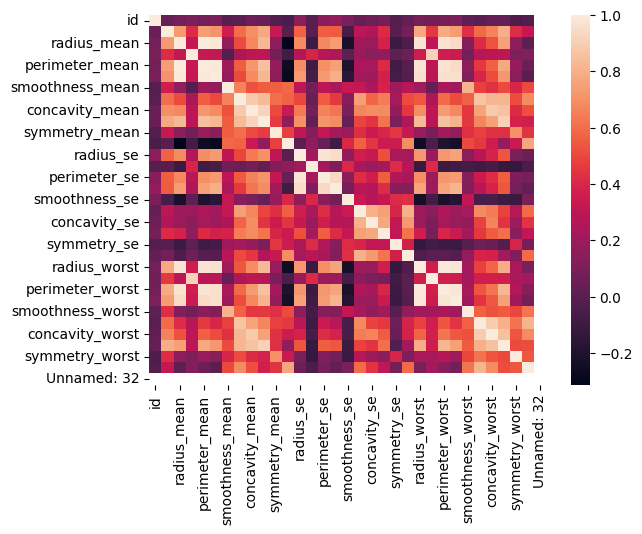

In [9]:
sns.heatmap(Cancer.corr())

## **Data Preprocessing**

In [10]:
Cancer.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [11]:
Cancer.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [12]:
Cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [13]:
# check null values after droping 'Unnamed: 32'
Cancer.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


There is no Null values

## **Define Target Variable (y) and Feature Variables (X)**

In [14]:
Cancer.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [15]:
X = Cancer[[ 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

In [16]:
Y = Cancer['diagnosis']

In [17]:
Cancer.shape

(569, 31)

## **Train Test Split**

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=2529)

In [20]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((426, 30), (143, 30), (426,), (143,))

## **Modeling**

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
model = LogisticRegression(max_iter=2000)

## **Model Evaluation**

In [23]:
model.fit( X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=2000)

## **Prediction**

In [24]:
Y_pred = model.predict(X_test)

In [25]:
Y_pred

array(['0', '1', '1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0',
       '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1',
       '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0',
       '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0',
       '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '1', '1',
       '1', '1', '0', '1', '1', '0', '1', '0', '1', '0', '1', '0', '0',
       '1', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '0', '1',
       '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0',
       '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0',
       '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1',
       '1', '0', '1', '1', '1', '0', '0', '1', '0', '1', '0', '1', '0'],
      dtype=object)

**Accuracy**

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score (Y_test,Y_pred)

0.965034965034965

## **Explaination**

The Predictive Model achieves the 96% Accuracy. Logistic Regression model is capable of predicting whether a tumor is Benign(non-cancerous) or  Malignant (cancerous)  